USArrest data set contains the number of arrests for murder, assault, and rape for each of the 50 states in 1973. 
It also contains the percentage of people in the state who live in an urban area

In [1]:
# load all the required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
arrest_df = pd.read_csv("..../USArrests.csv", index_col=0)
arrest_df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
arrest_df.shape

(50, 4)

In [4]:
arrest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
arrest_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
arrest_df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [7]:
arrest_df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

# Principal Components Analysis

We have to scale the variables before performing PCA else most of the principal components that we observed 
would be driven by the Assault variable, since it has by far the largest mean and variance
It is important to standardize the variables to have mean zero and standard deviation 1 before performing PCA. 
This can be done by using the scale() function from sklearn

In [8]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(arrest_df), index=arrest_df.index, columns=arrest_df.columns)
X

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901
Connecticut,-1.040880,-0.736484,0.799761,-1.092723
Delaware,-0.437875,0.815030,0.450825,-0.585834
Florida,1.765415,1.990786,1.009122,1.150530
Georgia,2.229265,0.487757,-0.386621,0.492653


In [9]:
from sklearn.decomposition import PCA

pca_load = pd.DataFrame(PCA().fit(X).components_.T, index=arrest_df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_load
    

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [10]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X),columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


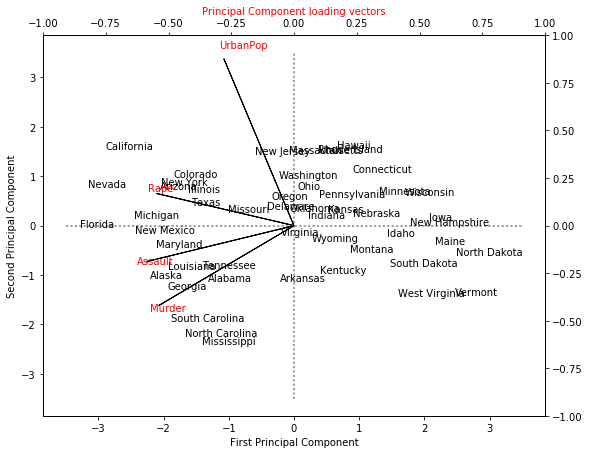

In [11]:
# Construct the biplot for the first two principal components

fig , ax1 = plt.subplots(figsize=(9,7))
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
           
           
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_load[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_load.V1.loc[i]*a, -pca_load.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_load.V1[0], -pca_load.V2[0])
ax2.arrow(0,0,-pca_load.V1[1], -pca_load.V2[1])
ax2.arrow(0,0,-pca_load.V1[2], -pca_load.V2[2])
ax2.arrow(0,0,-pca_load.V1[3], -pca_load.V2[3])

In [12]:
pca.explained_variance_

array([ 2.48024158,  0.98976515,  0.35656318,  0.17343009])

In [13]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

The first principal component explains 62.0% of the variance in the data, the next principal component explains 24.7% of the variance, and so forth.

([<matplotlib.axis.XTick at 0x11ab73940>,
 <a list of 4 Text xticklabel objects>)

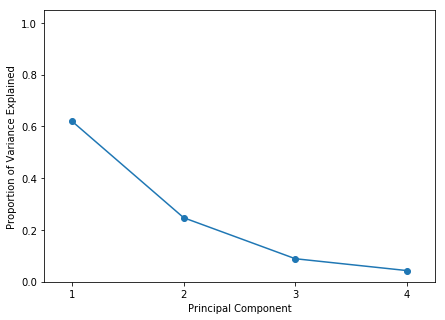

In [14]:
 plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x1175250b8>,
 <a list of 4 Text xticklabel objects>)

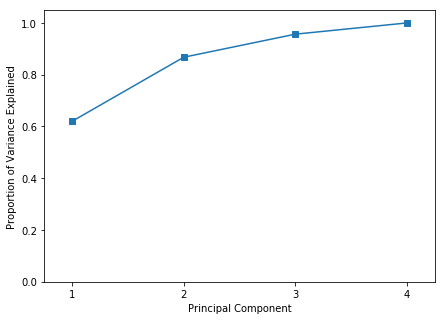

In [15]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])